<a href="https://colab.research.google.com/github/Bavitayadav8/Bavitayadav8/blob/main/KNN_Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report



In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 

**Importing the dataset**

In [5]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [7]:
from sklearn.model_selection import train_test_split

x = df[['Age','EstimatedSalary']]
y = df['Purchased']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)



**Feature Scaling**

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

ss = StandardScaler()
ss.fit(x_train)
ssx_train = ss.transform(x_train)
ssx_test = ss.transform(x_test)
List_of_accuracy = []
for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(ssx_train,y_train)
  t_pred = knn.predict(ssx_test)
  List_of_accuracy.append(accuracy_score(y_test,t_pred))

maxi_val =max(List_of_accuracy)
Total_neighbours = List_of_accuracy.index(maxi_val)

**Fitting K-NN to the Training set**

In [22]:
new_knn = KNeighborsClassifier(n_neighbors=Total_neighbours)
new_knn.fit(ssx_train, y_train)
     

KNeighborsClassifier(n_neighbors=2)

**Predicting the Test set results**

In [23]:
prediction = new_knn.predict(ssx_test)
print(prediction)

[1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1
 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 1 1 0]


**Making the Confusion Matrix**

In [12]:
from sklearn.metrics import classification_report, confusion_matrix 


In [13]:
print(confusion_matrix(y_test,prediction))
confustion_mat = confusion_matrix(y_test,prediction)

[[66  8]
 [18 28]]


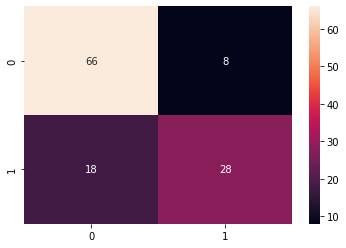

In [14]:
sns.heatmap(confustion_mat, annot=True)